In [1]:
import ROOT

Welcome to JupyROOT 6.24/04


In [2]:
monitoring_recon_filepath_pipkmks = '/w/halld-scshelf2101/home/viducic/data/acceptance_study/pipkmks_s18_042050_042059_monitoring.root'
monitoring_recon_filepath_pimkpks = '/w/halld-scshelf2101/home/viducic/data/acceptance_study/pimkpks_s18_042050_042059_monitoring.root'

pipkmks_file = ROOT.TFile(monitoring_recon_filepath_pipkmks, 'READ')
pimkpks_file = ROOT.TFile(monitoring_recon_filepath_pimkpks, 'READ')

In [3]:
def explore_directory(directory, depth=0):
    indent = "  " * depth
    print(f"{indent}Directory: {directory.GetName()}")
    
    keys = directory.GetListOfKeys()
    for key in keys:
        obj = key.ReadObj()
        if isinstance(obj, ROOT.TDirectory):
            explore_directory(obj, depth + 1)
        else:
            print(f"{indent}  {obj.GetName()}")

In [4]:
explore_directory(pipkmks_file)

Directory: /w/halld-scshelf2101/home/viducic/data/acceptance_study/pipkmks_s18_042050_042059_monitoring.root
  Directory: Independent
    Directory: Hist_NumReconstructedObjects
      NumHighLevelObjects
      NumChargedTracks
      NumPosChargedTracks
      NumNegChargedTracks
      NumTimeBasedTracks
      NumPosTimeBasedTracks
      NumNegTimeBasedTracks
      NumBeamPhotons
      NumFCALShowers
      NumCCALShowers
      NumBCALShowers
      NumNeutralShowers
      NumTOFPoints
      NumSCHits
      NumTrackBCALMatches
      NumTrackFCALMatches
      NumTrackTOFMatches
      NumTrackSCMatches
    Directory: Hist_Reconstruction
      Directory: Tracking
        Directory: q-
          PVsTheta_TimeBased_q-
          PVsTheta_TimeBased_GoodTrackFOM_q-
          PVsTheta_TimeBased_LowTrackFOM_q-
          PVsTheta_TimeBased_HighTrackFOM_q-
        Directory: q+
          PVsTheta_TimeBased_q+
          PVsTheta_TimeBased_GoodTrackFOM_q+
          PVsTheta_TimeBased_LowTrackFOM_q+
    

      TOFPointYVsX
      SCHitSector
      SCHitEnergy
      SCHitEnergyVsSector
      SCRFDeltaTVsSector
      TAGMRFDeltaTVsColumn
      TAGHRFDeltaTVsCounter
    Directory: Hist_EventVertex
      Directory: AllEvents
        EventVertexZ
        EventVertexYVsX
        EventVertexT
      Directory: 2+GoodTracks
        Directory: Pulls_Pi+
          Pull_Px
          Pull_Py
          Pull_Pz
          Pull_Xx
          Pull_Xy
          Pull_Xz
        Directory: Pulls_Proton
          Pull_Px
          Pull_Py
          Pull_Pz
          Pull_Xx
          Pull_Xy
          Pull_Xz
        Directory: Pulls_Pi-
          Pull_Px
          Pull_Py
          Pull_Pz
          Pull_Xx
          Pull_Xy
          Pull_Xz
        EventVertexZ
        EventVertexYVsX
        EventVertexT
        ConfidenceLevel
      RFTrackDeltaT
    Directory: Hist_DetectorMatching
      Directory: TimeBased
        Directory: SC
          PVsTheta_HasHit
          PVsTheta_NoHit
          PhiVsTheta_Ha

In [5]:
hist_string = '{}__ks_pippim__B4_M16/Hist_PID/{}/{}'

In [32]:
particle_dict = {
    'kaon': ('K-', 'K+'),
    'pion': ('Pi+', 'Pi-'),
}

In [33]:
c1 = ROOT.TCanvas("c1", "c1", 900, 800)
c1.Divide(2, 2)
c2 = ROOT.TCanvas("c2", "c2", 900, 800)
c2.Divide(2, 2)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


In [34]:
hist_kaon_tof_pipkmks = pipkmks_file.Get(hist_string.format('pipkmks', particle_dict['kaon'][0], 'TOF/DeltaTVsP'))
hist_kaon_tof_pimkpks = pimkpks_file.Get(hist_string.format('pimkpks', particle_dict['kaon'][1], 'TOF/DeltaTVsP'))
hist_kaon_cdc_pipkmks = pipkmks_file.Get(hist_string.format('pipkmks', particle_dict['kaon'][0], 'CDC/dEdXVsP_Int'))
hist_kaon_cdc_pimkpks = pimkpks_file.Get(hist_string.format('pimkpks', particle_dict['kaon'][1], 'CDC/dEdXVsP_Int'))

In [35]:
hist_pion_tof_pipkmks = pipkmks_file.Get(hist_string.format('pipkmks', particle_dict['pion'][0], 'TOF/DeltaTVsP'))
hist_pion_tof_pimkpks = pimkpks_file.Get(hist_string.format('pimkpks', particle_dict['pion'][1], 'TOF/DeltaTVsP'))
hist_pion_cdc_pipkmks = pipkmks_file.Get(hist_string.format('pipkmks', particle_dict['pion'][0], 'CDC/dEdXVsP_Int'))
hist_pion_cdc_pimkpks = pimkpks_file.Get(hist_string.format('pimkpks', particle_dict['pion'][1], 'CDC/dEdXVsP_Int'))

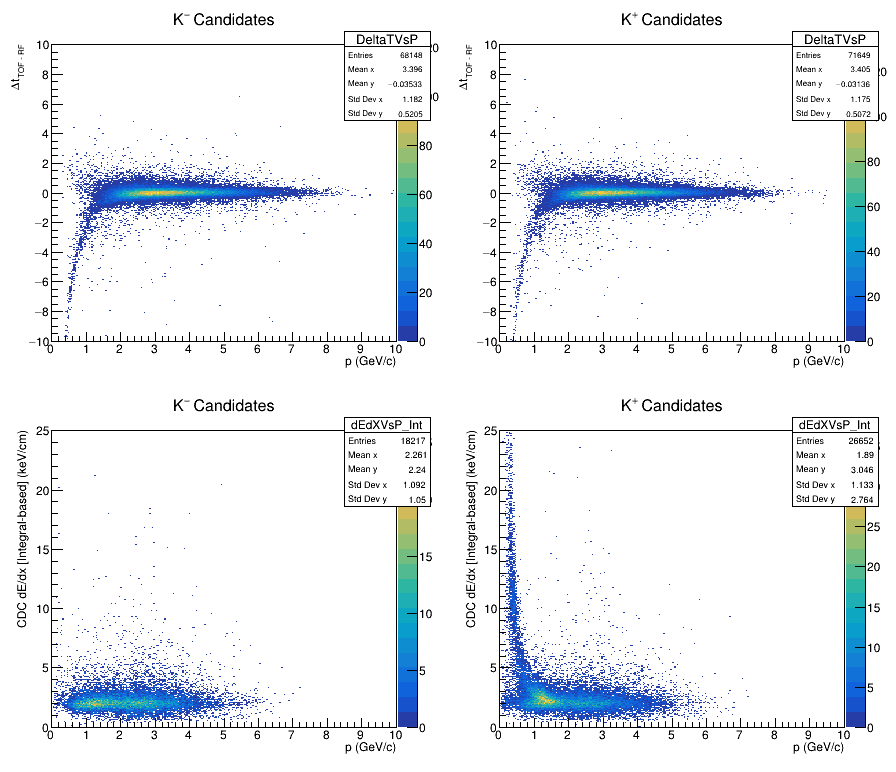

In [36]:
c1.cd(1)
hist_kaon_tof_pipkmks.Draw('colz')
c1.cd(2)
hist_kaon_tof_pimkpks.Draw('colz')
c1.cd(3)
hist_kaon_cdc_pipkmks.Draw('colz')
c1.cd(4)
hist_kaon_cdc_pimkpks.Draw('colz')
c1.Draw()

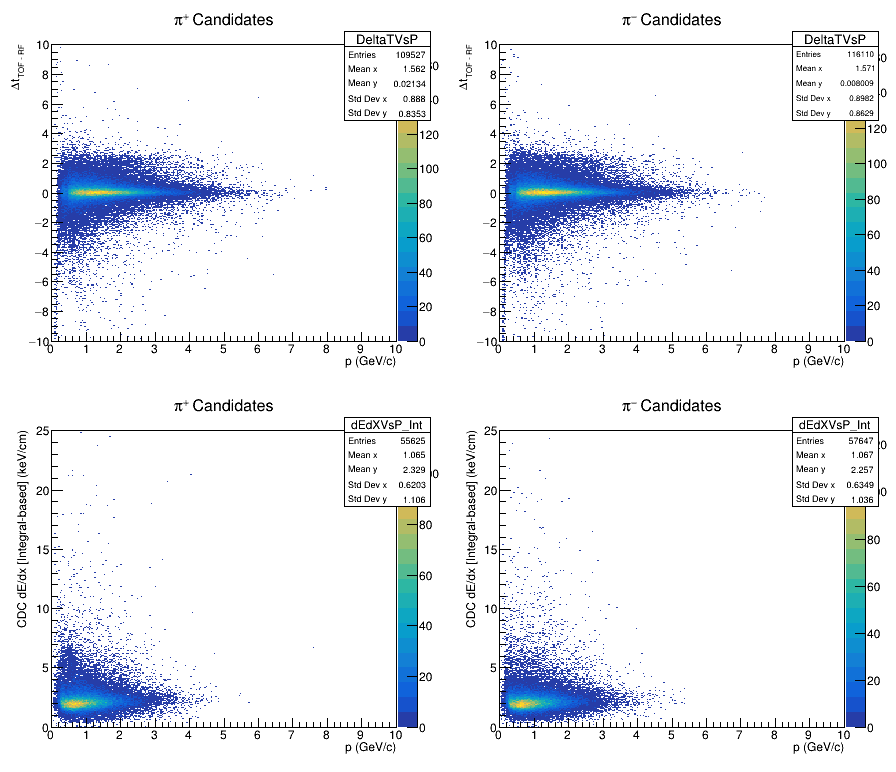

In [37]:
c2.cd(1)
hist_pion_tof_pipkmks.Draw('colz')
c2.cd(2)
hist_pion_tof_pimkpks.Draw('colz')
c2.cd(3)
hist_pion_cdc_pipkmks.Draw('colz')
c2.cd(4)
hist_pion_cdc_pimkpks.Draw('colz')
c2.Draw()